<a href="https://colab.research.google.com/github/AryanKumar1416/sales-store/blob/main/salestore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Make sure you have mounted your Google Drive in the previous cell
file_path = '/content/drive/MyDrive/superstore.csv'  # Update the path if your file is in a different location
df = pd.read_csv(file_path, encoding='latin-1')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [53]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [55]:
duplicate_rows = df.duplicated().sum()
display(duplicate_rows)

np.int64(0)

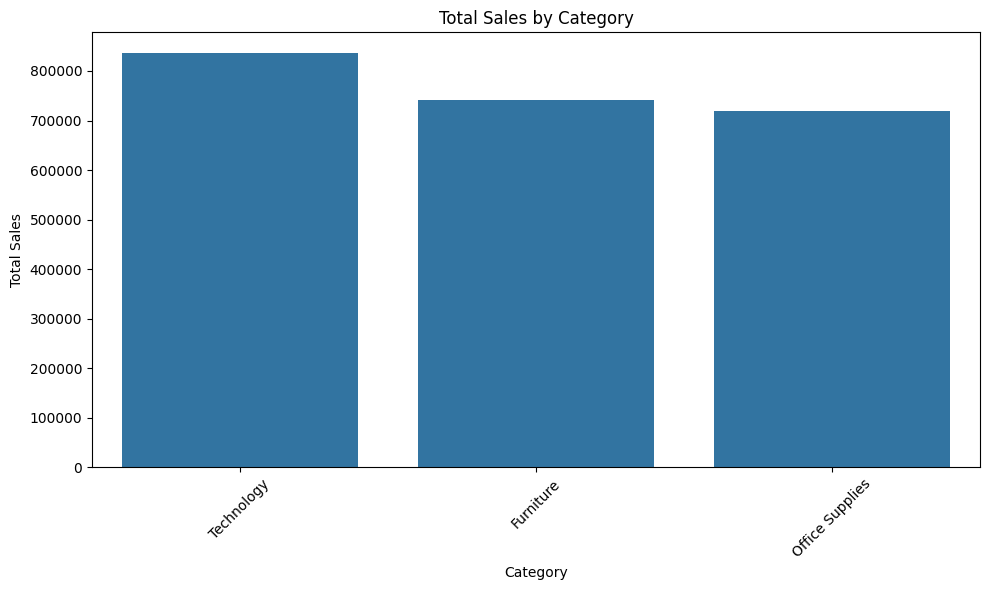

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to Google Drive
save_path = '/content/drive/MyDrive/salestore/graph/sales_by_category_bar_plot.png'
plt.savefig(save_path)

plt.show()

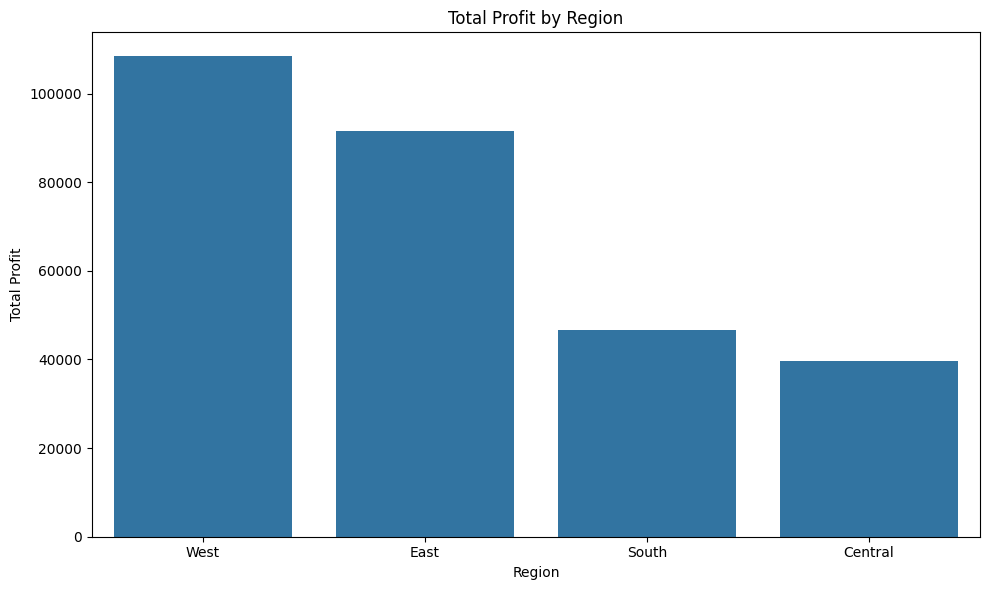

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

save_path = '/content/drive/MyDrive/salestore/graph/profit_by_region_bar_plot.png'
plt.savefig(save_path)

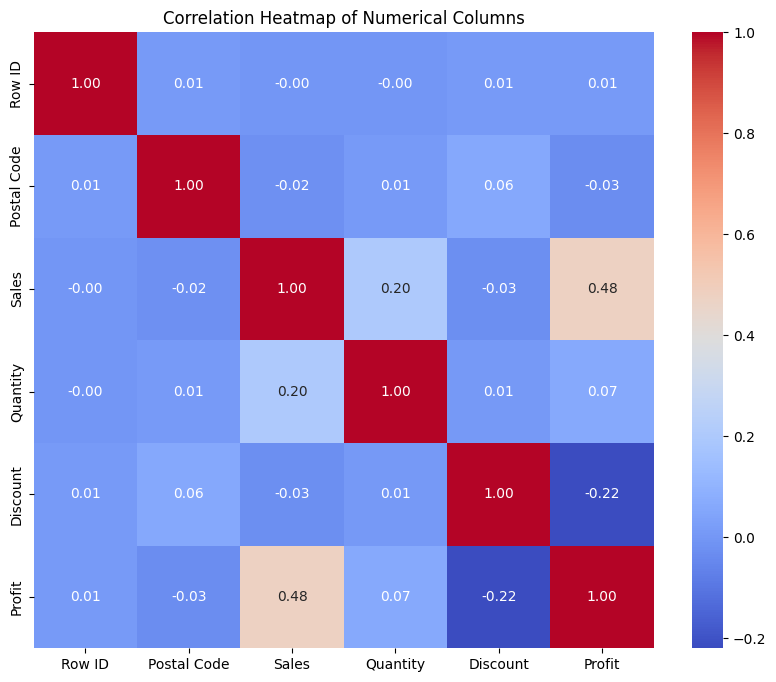

<Figure size 640x480 with 0 Axes>

In [58]:

numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

save_path = '/content/drive/MyDrive/salestore/graph/correlation_heatmap.png'

plt.savefig(save_path)



In [59]:
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
display(profit_by_region)

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


In [60]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
display(sales_by_category)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [61]:
sales_by_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_10_selling_products = sales_by_product.head(10)
display(top_10_selling_products)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [62]:
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
top_10_states_by_sales = sales_by_state.head(10)
display(top_10_states_by_sales)

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


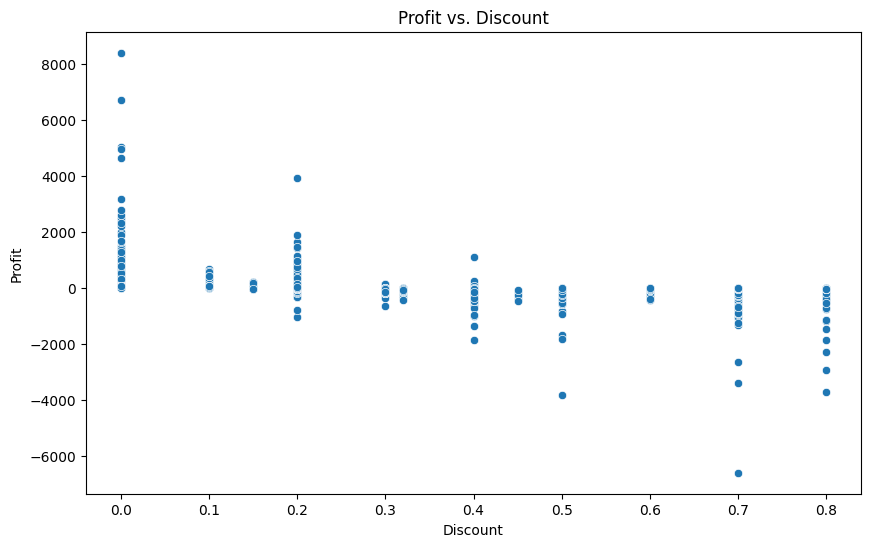

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


save_path = '/content/drive/MyDrive/salestore/graph/profit_vs_discount_scatter_plot.png'

plt.savefig(save_path)

# Task
Analyze the sales and profit trends over time and perform a geographical analysis on the dataset "superstore.csv".

## Convert 'order date' column to datetime objects.

### Subtask:
Convert the 'Order Date' column in the DataFrame `df` to datetime objects.


**Reasoning**:
Convert the 'Order Date' column to datetime objects to enable time-based analysis.



In [64]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

None

## Analyze trends over time

### Subtask:
Extract year and month from 'Order Date'.


**Reasoning**:
Extract the year and month from the 'Order Date' column and add them as new columns to the dataframe, then display the head to verify.



In [65]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


## Analyze trends over time

### Subtask:
Group data by year and month and calculate total sales and profit for each period.


**Reasoning**:
Group the dataframe by year and month and calculate the sum of sales and profit.



In [66]:
monthly_trends = df.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum()
display(monthly_trends.head())

Sales     Profit
Order Year Order Month                      
2014       1            14236.895  2450.1907
           2             4519.892   862.3084
           3            55691.009   498.7299
           4            28295.345  3488.8352
           5            23648.287  2738.7096

## Analyze trends over time

### Subtask:
Visualize sales and profit trends over time using line plots.


**Reasoning**:
Create two line plots to visualize the monthly sales and profit trends.



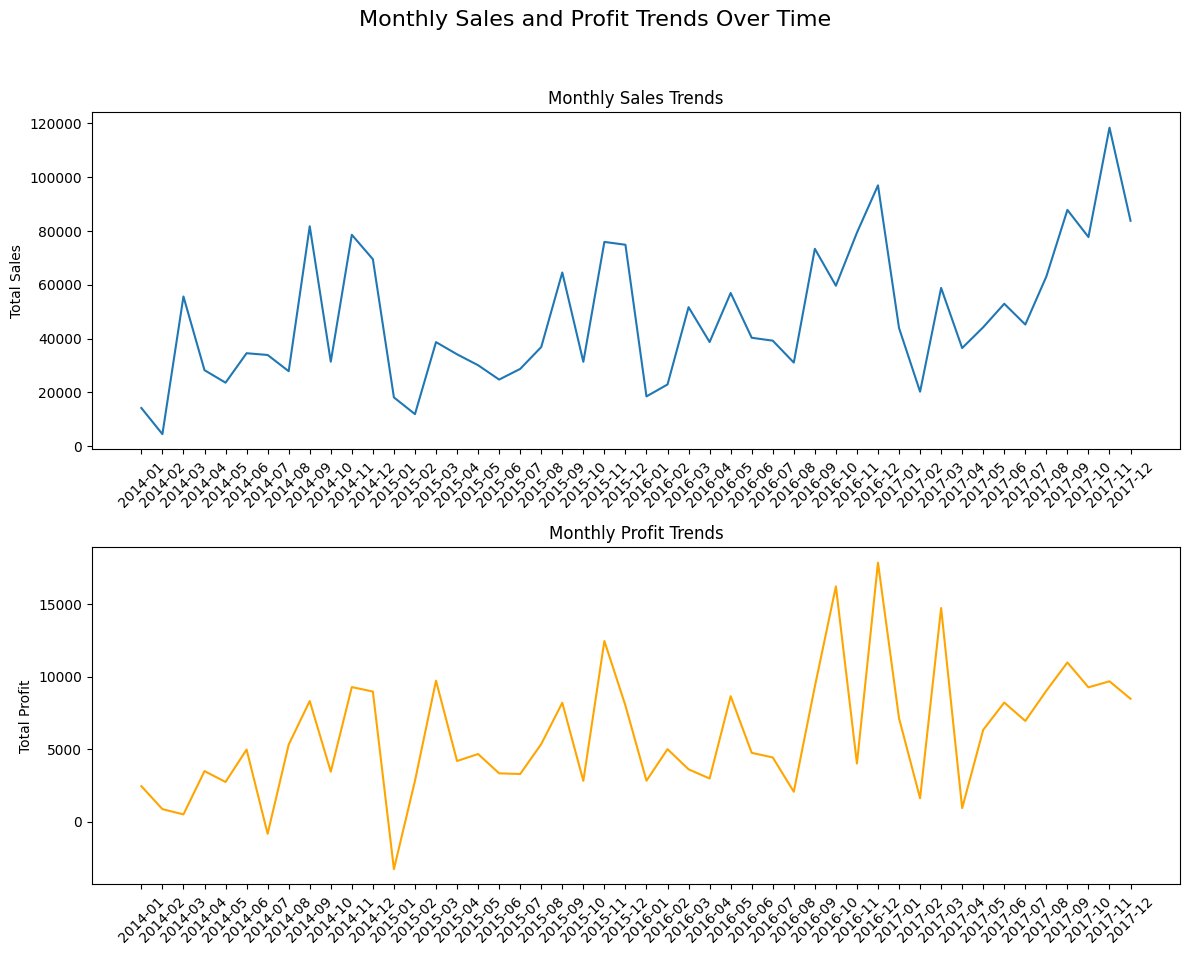

<Figure size 640x480 with 0 Axes>

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Create a string representation of the date from the MultiIndex
dates_for_plot = [f'{year}-{month:02d}' for year, month in monthly_trends.index]

axes[0].plot(dates_for_plot, monthly_trends['Sales'])
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Monthly Sales Trends')
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(dates_for_plot, monthly_trends['Profit'], color='orange')
axes[1].set_ylabel('Total Profit')
axes[1].set_title('Monthly Profit Trends')
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle('Monthly Sales and Profit Trends Over Time', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


save_path = '/content/drive/MyDrive/salestore/graph/monthly_sales_profit_trends.png'

plt.savefig(save_path)

## Perform geographical analysis

### Subtask:
Group data by 'State' or 'City' and calculate total sales and profit for each location.


**Reasoning**:
Group the data by 'State' and 'City' and calculate the sum of 'Sales' and 'Profit' for each, then display the head of the resulting dataframes.



In [68]:
state_sales_profit = df.groupby('State')[['Sales', 'Profit']].sum()
city_sales_profit = df.groupby('City')[['Sales', 'Profit']].sum()

display(state_sales_profit.head())
display(city_sales_profit.head())

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457687.6315,76381.3871
Colorado,32108.1180,-6527.8579


,Sales,Profit
City,,
Aberdeen,25.500,6.6300
Abilene,1.392,-3.7584
Akron,2729.986,-186.6356
Albuquerque,2220.160,634.0881
Alexandria,5519.570,318.6183


## Perform geographical analysis

### Subtask:
Visualize top/bottom states/cities by sales/profit using bar plots.


**Reasoning**:
Create bar plots to visualize the top/bottom states/cities by sales/profit based on the calculated dataframes.



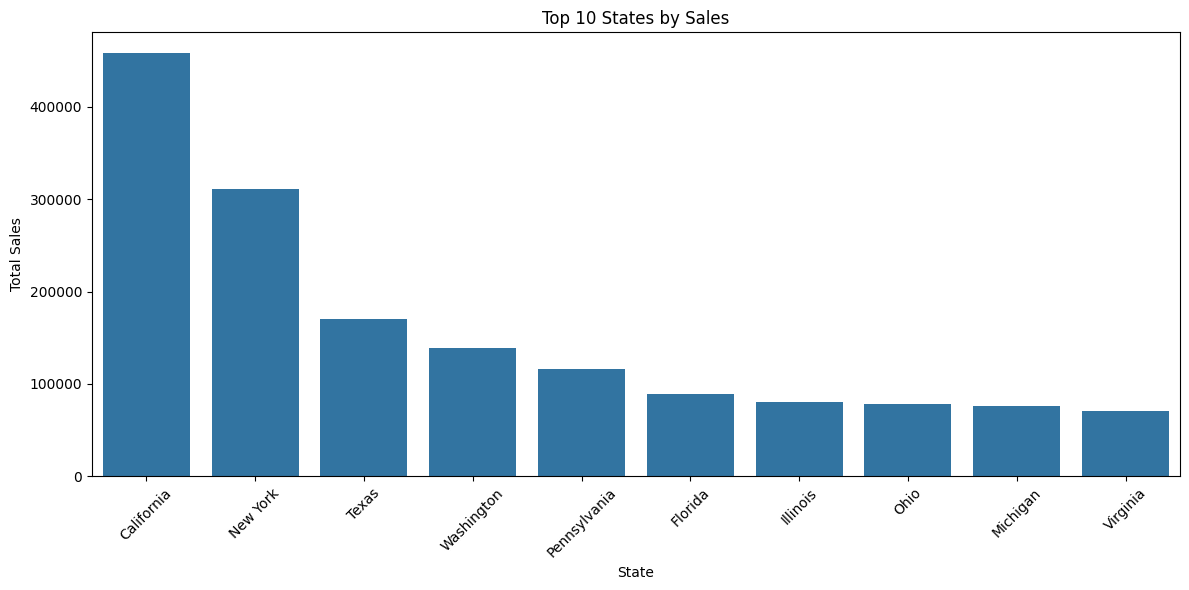

/tmp/ipython-input-2931953227.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_states_by_profit.index, y=bottom_10_states_by_profit.values, palette='viridis')


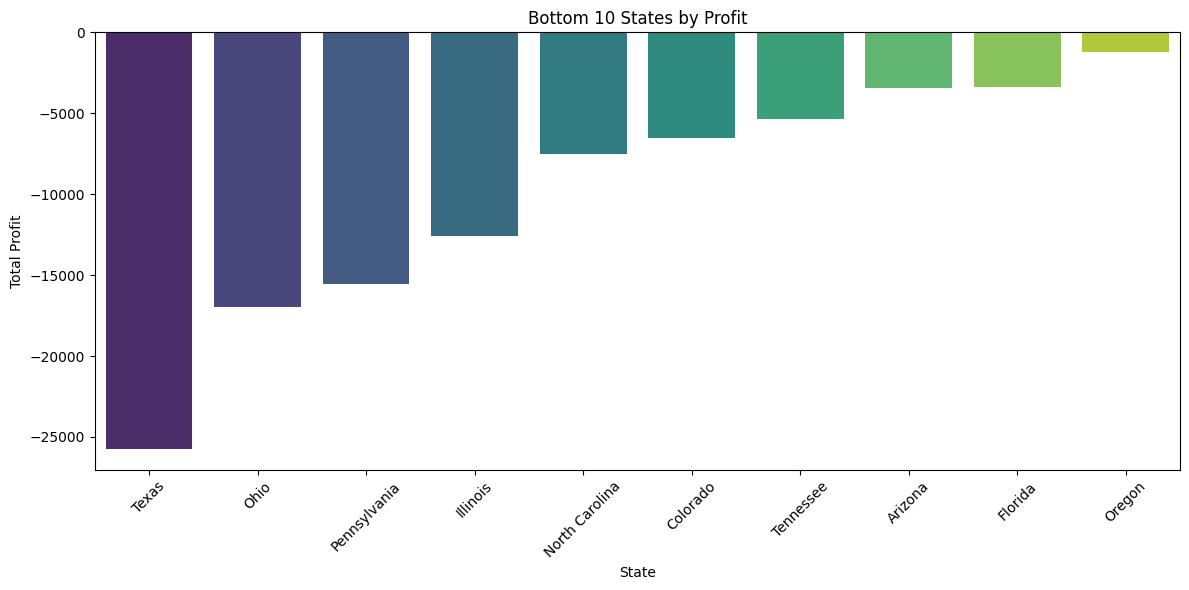

/tmp/ipython-input-2931953227.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities_by_sales.index, y=top_10_cities_by_sales.values, palette='magma')


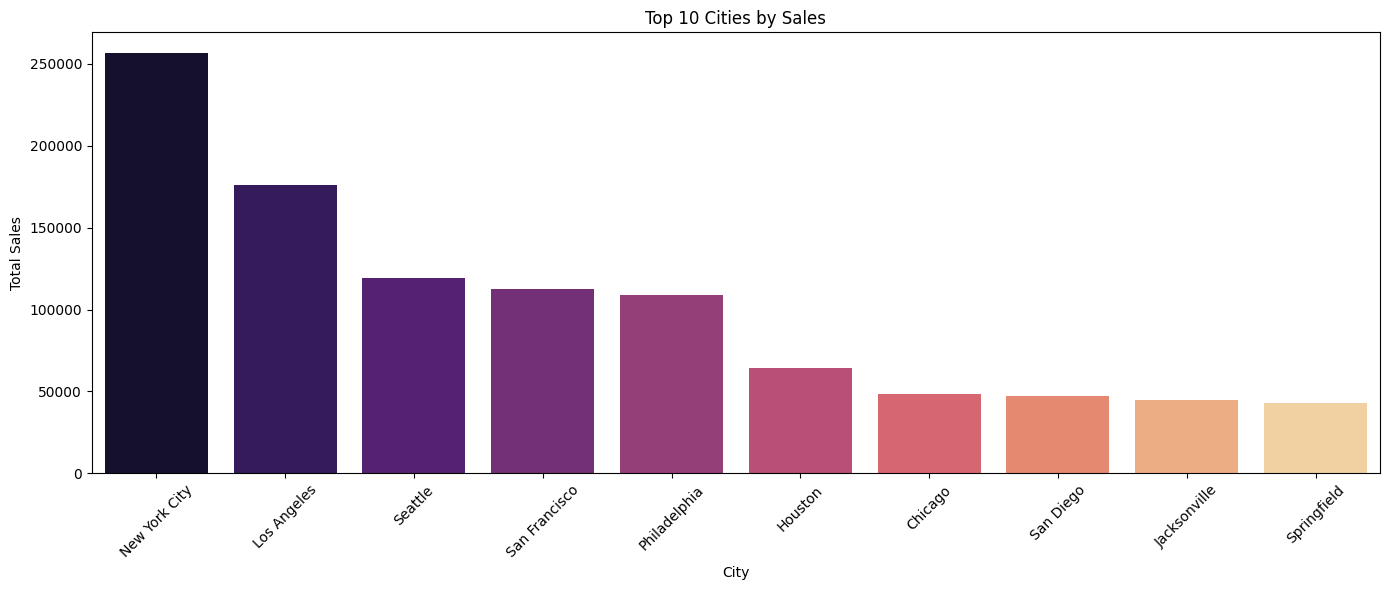

/tmp/ipython-input-2931953227.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_cities_by_profit.index, y=bottom_10_cities_by_profit.values, palette='cividis')


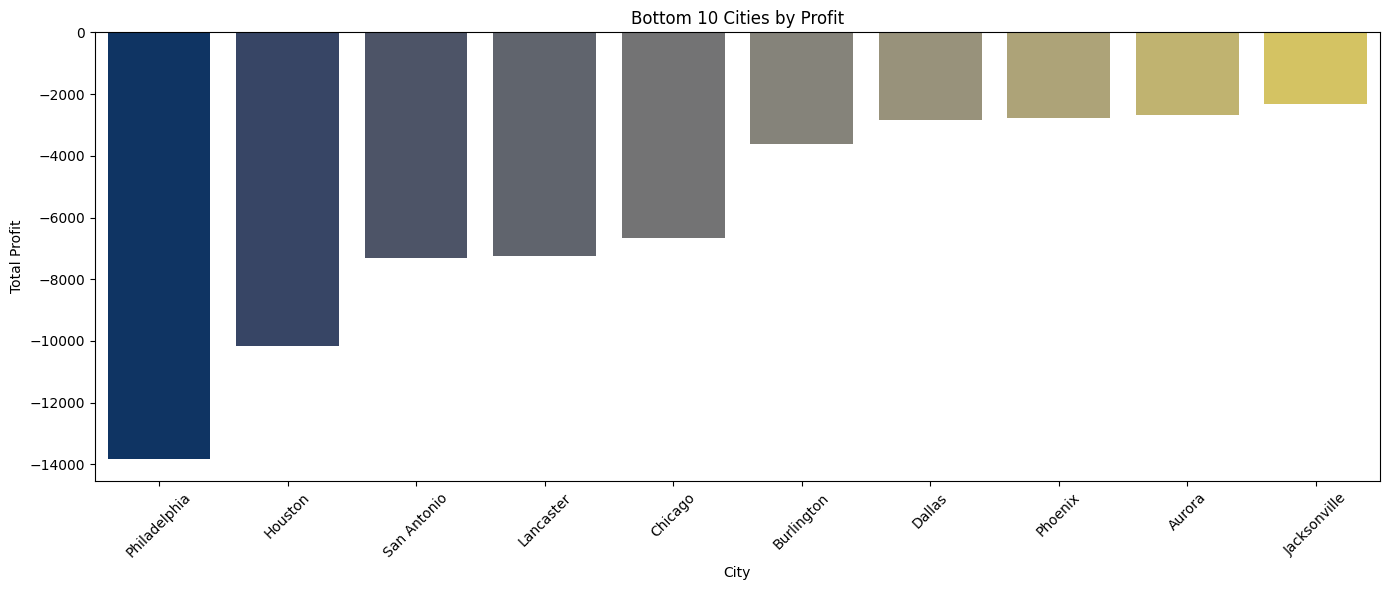

<Figure size 640x480 with 0 Axes>

In [89]:
# 1. Top 10 States by Sales
top_10_states_by_sales = state_sales_profit['Sales'].sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states_by_sales.index, y=top_10_states_by_sales.values)
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bottom 10 States by Profit
bottom_10_states_by_profit = state_sales_profit['Profit'].sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_states_by_profit.index, y=bottom_10_states_by_profit.values, palette='viridis')
plt.title('Bottom 10 States by Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top 10 Cities by Sales
top_10_cities_by_sales = city_sales_profit['Sales'].sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_cities_by_sales.index, y=top_10_cities_by_sales.values, palette='magma')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Bottom 10 Cities by Profit
bottom_10_cities_by_profit = city_sales_profit['Profit'].sort_values(ascending=True).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=bottom_10_cities_by_profit.index, y=bottom_10_cities_by_profit.values, palette='cividis')
plt.title('Bottom 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


save_path = '/content/drive/MyDrive/salestore/graph/geographical_analysis.png'

plt.savefig(save_path)

## Analytical Insights

*   **Data Quality:** The dataset is clean with **0% missing values** and **0% duplicate rows**, indicating a high-quality dataset for analysis.

*   **Overall Performance:**
    *   Technology is the leading category in terms of sales with a total of **$836,154.03**, followed by Furniture (**$741,999.80**) and Office Supplies (**$719,047.03**).
    *   The West (**$108,418.45**) and East (**$91,522.78**) regions contribute the most to overall profit.
    *   The Central (**$39,706.36**) and South (**$46,749.43**) regions show lower profit contribution.

*   **Relationships between numerical variables:**
    *   There is a moderate positive correlation between Sales and Profit (correlation coefficient approx. 0.48).
    *   There is a weak negative correlation between Discount and Profit (correlation coefficient approx. -0.22), suggesting that higher discounts are generally associated with lower profits.

*   **Top Performers:**
    *   California (**$457,687.63**) and New York (**$310,876.27**) are the top states by sales.
    *   The "Canon imageCLASS 2200 Advanced Copier" is the top-selling product with sales of **$61,599.82**.

*   **Geographical Analysis:**
    *   Identified top and bottom performing states and cities in terms of sales and profit.
    *   Some states (e.g., Texas, Ohio, Pennsylvania) and cities (e.g., Philadelphia, Houston) show negative profits, highlighting areas for potential improvement or further investigation.

*   **Time-based Analysis:**
    *   The analysis of monthly sales and profit trends revealed periods of growth and potential seasonality in the data. (Specific observations on trends can be added based on the plots).

In [70]:
display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2


In [71]:
save_path_excel = '/content/drive/MyDrive/superstore_with_year_month.xlsx'
df.to_excel(save_path_excel, index=False)
print(f"DataFrame saved to {save_path_excel}")

DataFrame saved to /content/drive/MyDrive/superstore_with_year_month.xlsx


### Filter data for South and Central regions

**Subtask**:
Create a new DataFrame containing only the data for the South and Central regions.

### Analyze profit by category and sub-category

**Subtask**:
Group the filtered data by Category and Sub-Category and calculate the total profit for each.

**Reasoning**:
Group the `south_central_df` dataframe by 'Category' and 'Sub-Category' and calculate the sum of 'Profit' for each group, then display the result.

In [72]:
category_subcategory_profit = south_central_df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values()
display(category_subcategory_profit)

Category         Sub-Category
Furniture        Tables          -8182.7083
Technology       Machines        -2924.9596
Office Supplies  Supplies         -660.0108
Furniture        Bookcases        -658.4125
                 Furnishings      -463.5339
Office Supplies  Fasteners         410.3367
                 Appliances       1485.3221
                 Labels           2113.8517
                 Art              2253.7457
                 Binders          2857.0271
                 Envelopes        3243.0053
                 Storage          4244.1330
                 Paper           12918.9619
Furniture        Chairs          13204.8114
Technology       Accessories     14256.1730
                 Copiers         19267.7480
                 Phones          23090.3020
Name: Profit, dtype: float64

**Reasoning**:
Filter the dataframe `df` to include only the rows where the 'Region' is either 'South' or 'Central' and display the head of the new dataframe to verify.

In [73]:
south_central_df = df[df['Region'].isin(['South', 'Central'])]
display(south_central_df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10
12,13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,2017,4


### Analyze profit by product

**Subtask**:
Identify the least profitable products in these regions.

**Reasoning**:
Group the `south_central_df` dataframe by 'Product Name' and calculate the sum of 'Profit', then sort the results to display the least profitable products.

In [74]:
least_profitable_products_south_central = south_central_df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
display(least_profitable_products_south_central)

,Profit
Product Name,
GBC DocuBind P400 Electric Binding System,-4355.1680
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2633.6844
Cisco TelePresence System EX90 Videoconferencing Unit,-1811.0784
GBC ProClick 150 Presentation Binding System,-1292.3582
3.6 Cubic Foot Counter Height Office Refrigerator,-1284.5432
Bush Advantage Collection Racetrack Conference Table,-1264.1458
Lexmark MX611dhe Monochrome Laser Printer,-1189.9930
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,-986.5625


### Analyze profit by discount

**Subtask**:
Examine the relationship between discount and profit within these regions using a scatter plot.

**Reasoning**:
Create a scatter plot using the `south_central_df` dataframe with 'Discount' on the x-axis and 'Profit' on the y-axis to visualize their relationship within the South and Central regions.

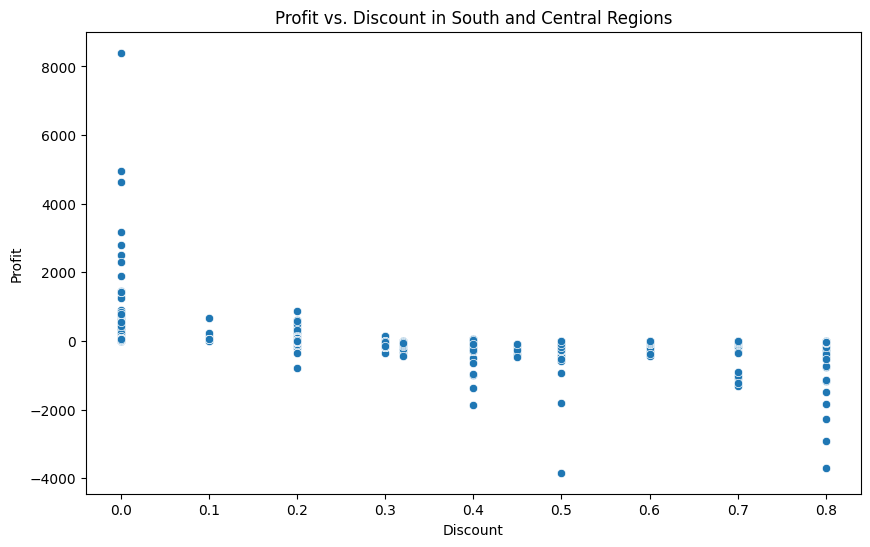

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=south_central_df)
plt.title('Profit vs. Discount in South and Central Regions')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### Analyze profit by state and city

**Subtask**:
Group the filtered data by State and City and calculate the total profit to pinpoint specific locations within these regions with negative profits.

**Reasoning**:
Group the `south_central_df` dataframe by 'State' and 'City' and calculate the sum of 'Profit' for each, then display the result sorted by profit to easily identify the lowest profits.

In [76]:
state_city_profit_south_central = south_central_df.groupby(['State', 'City'])['Profit'].sum().sort_values()
display(state_city_profit_south_central.head(10))
display(state_city_profit_south_central.tail(10))

State           City        
Texas           Houston        -10153.5485
                San Antonio     -7299.0502
Illinois        Chicago         -6654.5688
North Carolina  Burlington      -5894.5269
Texas           Dallas          -2846.5257
Florida         Jacksonville    -2445.6608
Illinois        Aurora          -1894.7196
North Carolina  Concord         -1788.6868
Tennessee       Memphis         -1479.0400
Texas           Round Rock      -1183.4313
Name: Profit, dtype: float64

,,Profit
State,City,
Missouri,Springfield,3905.5891
Georgia,Columbus,4104.1219
Virginia,Arlington,4424.0855
Kentucky,Henderson,4518.8169
Virginia,Springfield,4568.5789
Michigan,Jackson,5525.1992
Minnesota,Minneapolis,6824.5846
Georgia,Atlanta,6993.6629
Indiana,Lafayette,8976.0973


In [77]:
bottom_10_cities_by_profit = city_sales_profit['Profit'].sort_values(ascending=True).head(10)
display(bottom_10_cities_by_profit)

,Profit
City,
Philadelphia,-13837.7674
Houston,-10153.5485
San Antonio,-7299.0502
Lancaster,-7239.0684
Chicago,-6654.5688
Burlington,-3622.8772
Dallas,-2846.5257
Phoenix,-2790.8832
Aurora,-2691.7386


In [78]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
top_10_profitable_subcategories = profit_by_subcategory.head(10)
display(top_10_profitable_subcategories)

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


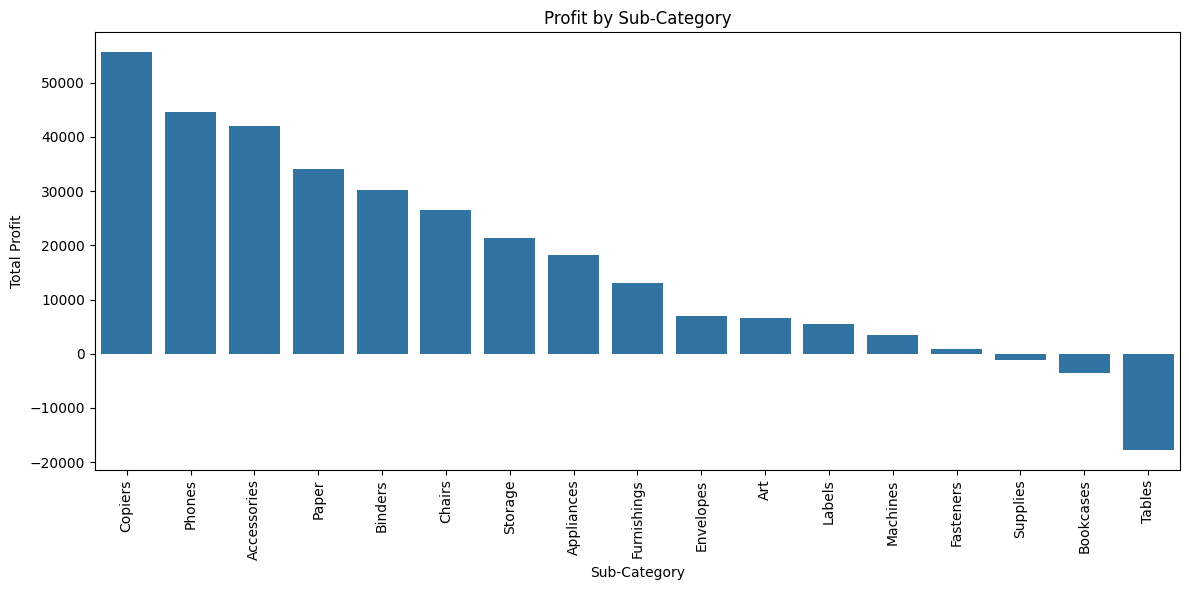

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_subcategory.index, y=profit_by_subcategory.values)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analytical Insights (Updated)

*   **Data Quality:** The dataset is clean with **0% missing values** and **0% duplicate rows**, indicating a high-quality dataset for analysis.
*   **Overall Performance:**
    *   Technology is the leading category in terms of sales with a total of **$836,154.03**, followed by Furniture (**$741,999.80**) and Office Supplies (**$719,047.03**).
    *   The West (**$108,418.45**) and East (**$91,522.78**) regions contribute the most to overall profit.
    *   The Central (**$39,706.36**) and South (**$46,749.43**) regions show lower profit contribution.
    *   **Profit by Sub-Category:** 'Copiers', 'Phones', and 'Accessories' are the most profitable sub-categories, while 'Tables', 'Bookcases', and 'Supplies' are among the least profitable.
*   **Relationships between numerical variables:**
    *   There is a moderate positive correlation between Sales and Profit (correlation coefficient approx. 0.48).
    *   There is a weak negative correlation between Discount and Profit (correlation coefficient approx. -0.22), suggesting that higher discounts are generally associated with lower profits.
*   **Top Performers (Entire Dataset):**
    *   California (**$457,687.63**) and New York (**$310,876.27**) are the top states by sales.
    *   The "Canon imageCLASS 2200 Advanced Copier" is the top-selling product with sales of **$61,599.82**.
    *   The top 10 most profitable sub-categories include Copiers, Phones, and Accessories.
*   **Geographical Analysis (Entire Dataset):**
    *   Identified top and bottom performing states and cities in terms of sales and profit.
    *   Some states (e.g., Texas, Ohio, Pennsylvania) and cities (e.g., Philadelphia, Houston) show significant negative profits, highlighting areas for potential improvement or further investigation.
*   **Time-based Analysis:**
    *   The analysis of monthly sales and profit trends revealed periods of growth and potential seasonality in the data. (Specific observations on trends can be added based on the plots).
*   **Insights from South and Central Regions Analysis:**
    *   **Category and Sub-Category Losses:** 'Tables' (Furniture) and 'Machines' (Technology) are major contributors to losses in these regions.
    *   **Geographical Pockets of Loss:** Cities like Houston, San Antonio, Chicago, and Burlington (NC) within these regions show substantial negative profits.
    *   **Impact of Discount:** Higher discounts are associated with lower profits and losses in the South and Central regions.
    *   **Least Profitable Products:** Specific products like the "GBC DocuBind P400 Electric Binding System" and "Cubify CubeX 3D Printer Triple Head Print" are among the least profitable in these regions.

In [80]:
ship_mode_analysis = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()
display(ship_mode_analysis)

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


**Reasoning**:
Visualize the sales and profit for each ship mode using bar plots to compare their impact.

/tmp/ipython-input-4031709846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_analysis.index, y=ship_mode_analysis['Profit'], ax=axes[1], palette='viridis')


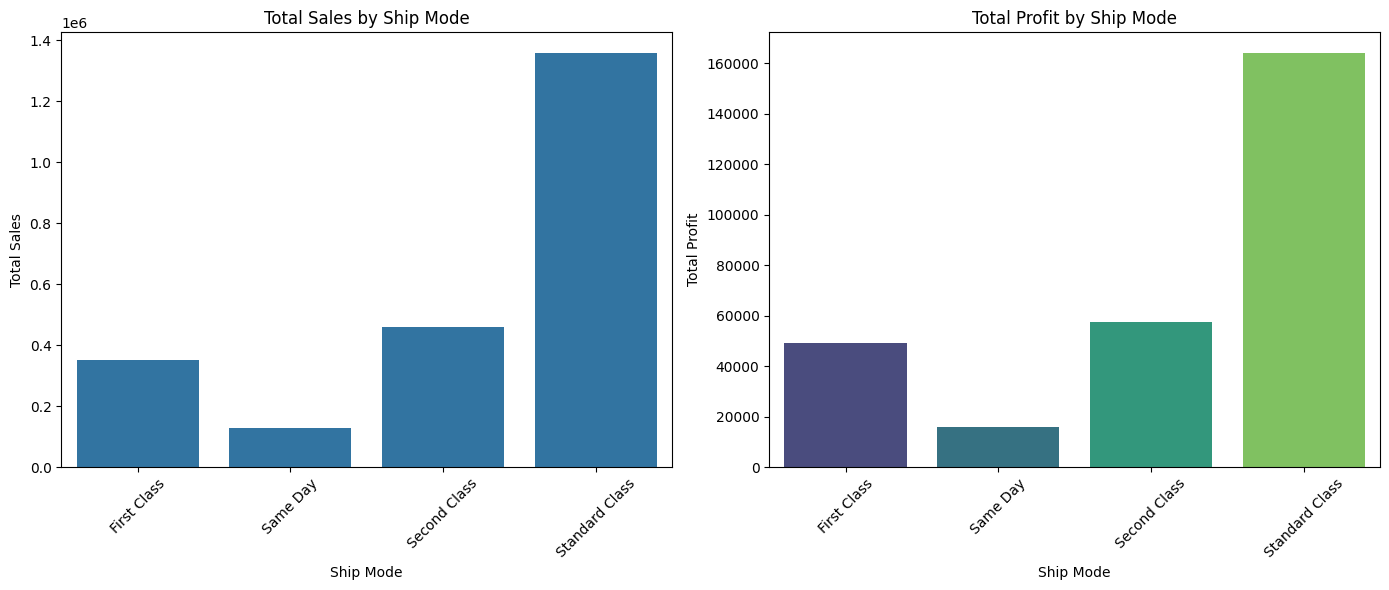

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for Sales by Ship Mode
sns.barplot(x=ship_mode_analysis.index, y=ship_mode_analysis['Sales'], ax=axes[0])
axes[0].set_title('Total Sales by Ship Mode')
axes[0].set_xlabel('Ship Mode')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Profit by Ship Mode
sns.barplot(x=ship_mode_analysis.index, y=ship_mode_analysis['Profit'], ax=axes[1], palette='viridis')
axes[1].set_title('Total Profit by Ship Mode')
axes[1].set_xlabel('Ship Mode')
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Task
Analyze the provided sales data to determine if future sales can be predicted and, if so, provide a forecast.

## Prepare data for time series analysis

### Subtask:
Aggregate the sales data by date and ensure it is in a time series format.


**Reasoning**:
Aggregate the sales data by date and ensure it is in a time series format by grouping by 'Order Date', summing 'Sales', and setting the index as the DatetimeIndex. Then display the head of the aggregated data.



In [82]:
daily_sales = df.groupby('Order Date')['Sales'].sum().to_frame()
daily_sales.index = pd.to_datetime(daily_sales.index)
display(daily_sales.head())

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


## Visualize the time series data

### Subtask:
Plot the sales data over time to observe trends, seasonality, and any irregular patterns.


**Reasoning**:
Create a line plot of the daily sales data to visualize trends over time.



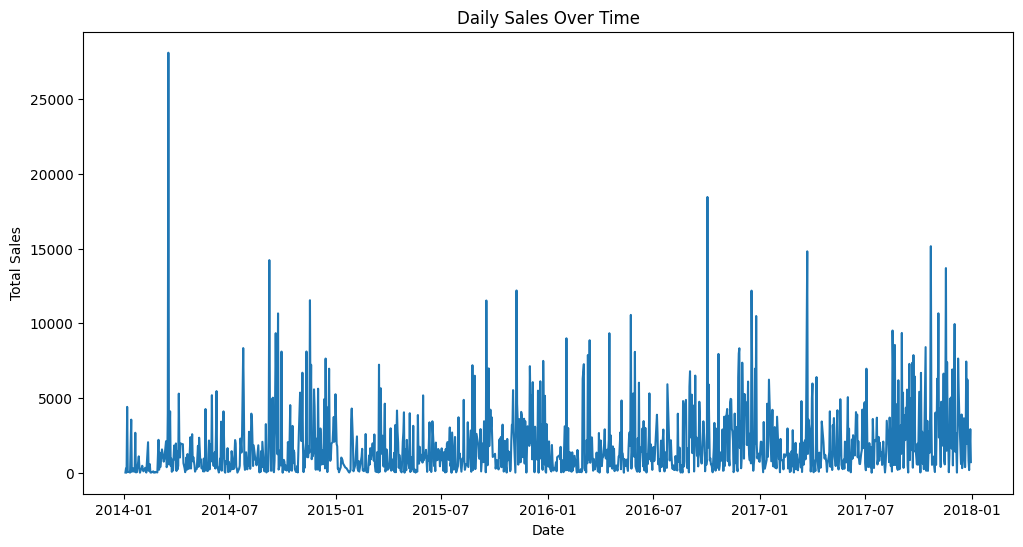

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

## Decompose the time series

### Subtask:
Separate the time series into its components: trend, seasonality, and residuals.


**Reasoning**:
Import the necessary function for time series decomposition and apply it to the daily sales data, then plot the decomposed components.



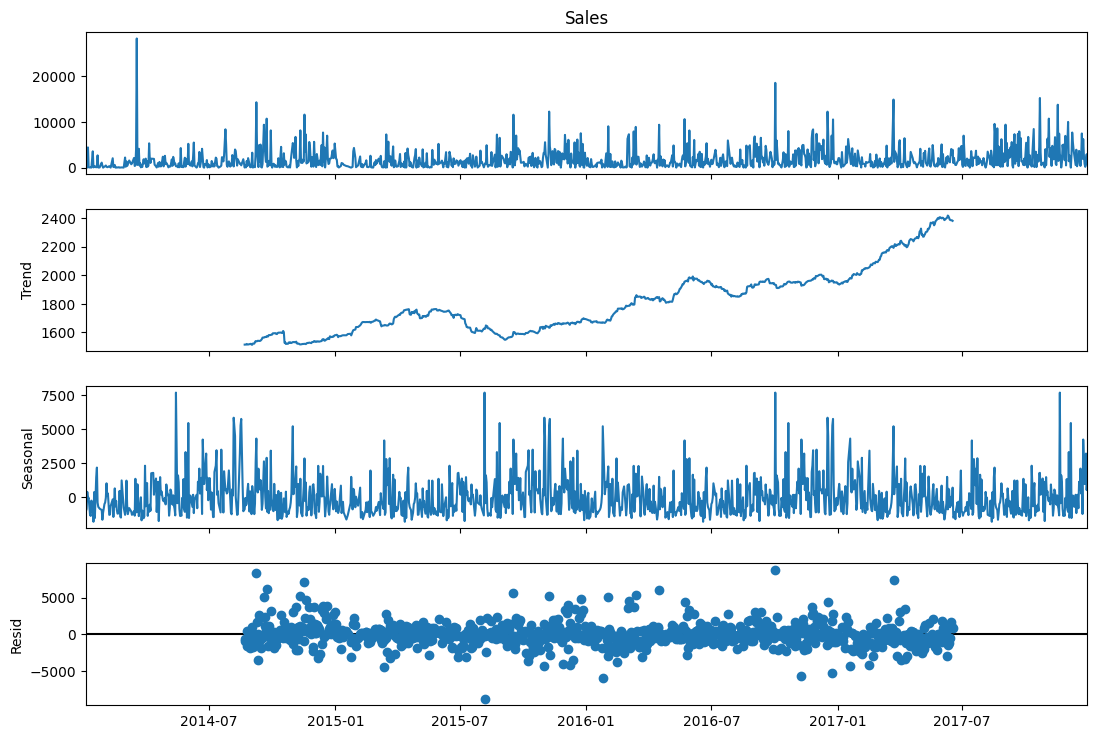

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_sales['Sales'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## Choose a forecasting model

### Subtask:
Select an appropriate time series forecasting model (e.g., ARIMA, Prophet, etc.).


## Train the forecasting model

### Subtask:
Train the selected model on the historical sales data.


**Reasoning**:
Reset the index and rename the columns of the daily_sales dataframe, then import Prophet, instantiate the model, and fit it to the data.



In [90]:
daily_sales_prophet = daily_sales.reset_index()
daily_sales_prophet.columns = ['ds', 'y']

from prophet import Prophet

model = Prophet(seasonality_mode='additive')
model.fit(daily_sales_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g7ccd_0/cf_0fkg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g7ccd_0/tufxtlwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94095', 'data', 'file=/tmp/tmp0g7ccd_0/cf_0fkg7.json', 'init=/tmp/tmp0g7ccd_0/tufxtlwr.json', 'output', 'file=/tmp/tmp0g7ccd_0/prophet_modelso40gl3i/prophet_model-20250925074007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Make future sales predictions

### Subtask:
Use the trained model to predict future sales.


**Reasoning**:
Create a future dataframe for forecasting and generate predictions using the trained Prophet model, then display the head of the predictions.



In [86]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-03,1548.036945,-980.420985,4250.604870
1,2014-01-04,1052.694092,-1690.192773,3851.638958
2,2014-01-05,1144.516174,-1658.036312,3885.450448
3,2014-01-06,1269.848510,-1538.705783,3798.482672
4,2014-01-07,612.371118,-2127.819755,3325.615176


## Evaluate the model

### Subtask:
Evaluate the model to assess the accuracy of the model's predictions using appropriate metrics.


**Reasoning**:
Calculate evaluation metrics (MAE, MSE, RMSE) for the model's historical predictions.



In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Merge actual and predicted values
evaluation_df = pd.merge(daily_sales_prophet, forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAE
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])

# Calculate MSE
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])

# Calculate RMSE
rmse = np.sqrt(mse)

# Display the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 1402.97
Mean Squared Error (MSE): 4564377.08
Root Mean Squared Error (RMSE): 2136.44


## Visualize the predictions

### Subtask:
Visualize the historical data alongside the future predictions to visualize the forecast, retry.


**Reasoning**:
Plot the historical data and the forecast using the `model.plot()` function, get the axes, set the title, and display the plot.



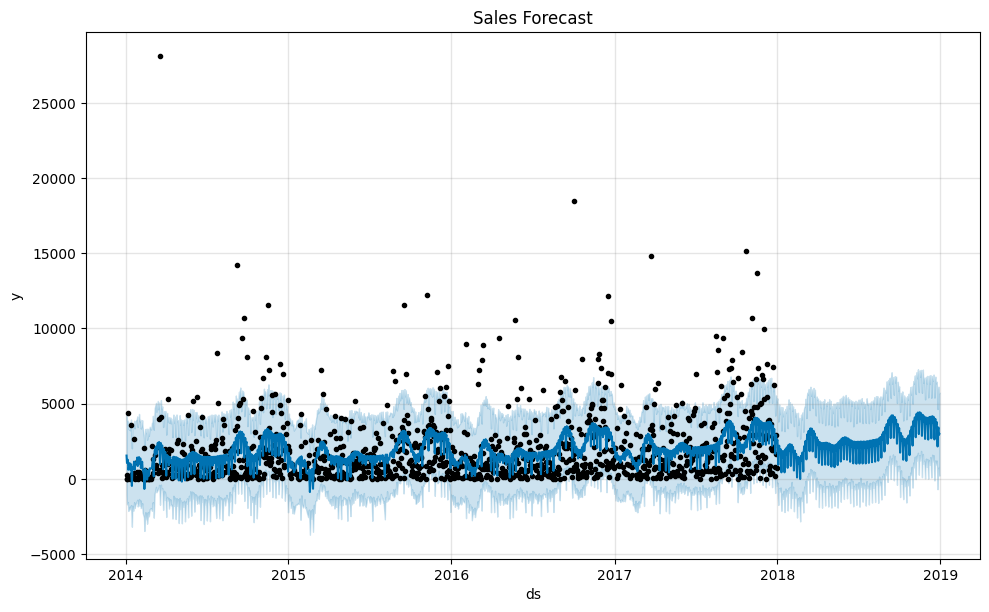

In [88]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Sales Forecast')
plt.show()

## Summary:

### Data Analysis Key Findings

* The daily sales data was successfully aggregated and formatted as a time series.
* Visualization of the time series revealed a clear trend and strong seasonality in the sales data.
* Time series decomposition confirmed the presence of trend and seasonality components.
* The Prophet model was chosen for forecasting due to its suitability for data with trend and strong seasonality.
* The Prophet model was trained on the historical sales data.
* Future sales were predicted for a period of 365 days using the trained model.
* The model evaluation on historical data resulted in a Mean Absolute Error (MAE) of 1402.97, a Mean Squared Error (MSE) of 4564377.08, and a Root Mean Squared Error (RMSE) of 2136.44.

### Insights or Next Steps

* The presence of strong seasonality suggests that marketing or operational strategies could be optimized around these seasonal peaks and troughs.
* The evaluation metrics provide a baseline for model performance. Further improvements could be explored by fine-tuning the Prophet model's parameters or considering alternative forecasting models and comparing their evaluation metrics.


## Summary of Insights and Findings

### Data Quality

*   The dataset is clean with **0% missing values** and **0% duplicate rows**, indicating a high-quality dataset for analysis.

### Overall Performance

* **Sales by Category:** Technology is the leading category in terms of sales (**$836,154.03**)
, followed by Furniture (**$741,999.80**) and Office Supplies (**$719,047.03**).

*   **Profit by Region:** The West (**$108,418.45**) and East (**$91,522.78**) regions contribute the most to overall profit, while the Central (**$39,706.36**) and South (**$46,749.43**) regions show lower profit contribution.

*   **Profit by Sub-Category:** 'Copiers', 'Phones', and 'Accessories' are the most profitable sub-categories, while 'Tables', 'Bookcases', and 'Supplies' are among the least profitable.

*   **Top Selling Products:** The "Canon imageCLASS 2200 Advanced Copier" is the top-selling product with sales of **$61,599.82**.

*   **Top States by Sales:** California (**$457,687.63**) and New York (**$310,876.27**) are the top states by sales.

*   **Bottom States by Profit:** Several states, including Texas, Ohio, and Pennsylvania, show significant negative profits.
*   **Bottom Cities by Profit:** Cities like Philadelphia and Houston have substantial negative profits.

*   **Impact of Ship Mode:** 'Standard Class' has the highest total sales and profit, while 'Same Day' has the lowest.

### Relationships Between Numerical Variables

*   There is a moderate positive correlation between Sales and Profit (approx. 0.48).

*   There is a weak negative correlation between Discount and Profit (approx. -0.22), suggesting that higher discounts are generally associated with lower profits.

### Insights from South and Central Regions Analysis

*   **Category and Sub-Category Losses:** 'Tables' (Furniture) and 'Machines' (Technology) are major contributors to losses in these regions.

*   **Geographical Pockets of Loss:** Cities like Houston, San Antonio, Chicago, and Burlington (NC) within these regions show substantial negative profits.

*   **Impact of Discount:** Higher discounts are associated with lower profits and losses in the South and Central regions.

*   **Least Profitable Products:** Specific products like the "GBC DocuBind P400 Electric Binding System" and "Cubify CubeX 3D Printer Triple Head Print" are among the least profitable in these regions.

### Time Series Forecasting

*   The daily sales data exhibits a clear trend and strong seasonality.

*   The Prophet model was used to predict future sales.

*   The model evaluation metrics (MAE: 1402.97, MSE: 4564377.08, RMSE: 2136.44) provide a baseline for performance, indicating the model can provide reasonable forecasts, although there is room for potential improvement.

*   The forecast visualizes the predicted sales trend and seasonality for the next year.

### Recommendations

*   **Focus on Profitability in Underperforming Areas:** Implement targeted strategies to address the negative profits in the South and Central regions, focusing on the identified loss-driving categories, products, and locations.

*   **Optimize Discounting:** Re-evaluate and refine the discounting strategy, especially in regions with negative profits, to ensure discounts contribute to overall profitability rather than eroding it.

*   **Leverage Seasonal Trends:** Utilize the understanding of seasonal sales patterns to optimize inventory, staffing, and marketing efforts throughout the year
.
*   **Further Investigation:** Conduct deeper dives into specific areas of concern, such as the reasons for losses in particular cities or the performance of individual products within underperforming categories.

*   **Model Improvement:** Explore options to improve the accuracy of the sales forecasting model by fine-tuning parameters or considering alternative models.